### Imports

In [1]:
import torch
import torch.nn as nn # loss function
import torch.optim as optim # optimization algorithms like stochastic gradient descent, adam
import torch.nn.functional as F # all the function that don't have any parameters, relu, tanh
from torch.utils.data import DataLoader
import torchvision.datasets as datasets ## pytorch standard datasets
import torchvision.transforms as transforms
import torchvision
import matplotlib.pyplot as plt
from torchvision.utils import save_image

In [2]:
torch.cuda.is_available()

True

###  Custom Dataset

In [3]:
import os
import pandas as pd
import torch
from torch.utils.data import Dataset
from skimage import io # conda install scikit-image

class CatsAndDogsDataset(Dataset):
    def __init__(self, csv_file, root_dir, transforms=None):
        self.annotations = pd.read_csv(csv_file)
        self.root_dir = root_dir
        self.transforms = transforms
        
    def __len__(self):
        return len(self.annotations) # Number of images

    def __getitem__(self, index):
        img_path = os.path.join(self.root_dir, self.annotations.iloc[index, 0]) # Row i, column 0
        image = io.imread(img_path)
        y_label = torch.tensor(int(self.annotations.iloc[index, 1]))
        
        if self.transforms:
            image = self.transforms(image)
                
        return (image, y_label)

### Set Device

In [8]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

### Load Data

In [9]:
my_transforms = transforms.Compose([
#     transforms.ToPILImage(),
#     transforms.Resize((256, 256)),
#     transforms.RandomCrop((224,224)),
    transforms.RandomRotation(degrees=5),
    transforms.RandomHorizontalFlip(p=0.5),
#     transforms.RandomVerticalFlip(p=0.05),
    transforms.ColorJitter(brightness=0.5),
    transforms.GaussianBlur(kernel_size=1, sigma=(0.1, 2.0)),
#     transforms.RandomGrayscale(p=0.2),
    transforms.ToTensor(),
#     transforms.Normalize(mean=[0.0, 0.0, 0.0], std=[1.0, 1.0, 1.0]), # Value for each channels (value - mean)/std
])

# dataset = CatsAndDogsDataset(csv_file = "./dataset/cats_dogs/cats_dogs.csv", root_dir="./dataset/cats_dogs", 
#                              transforms = my_transforms)


dataset = datasets.ImageFolder(root="./dataset/thai_house_resized_64", transform=my_transforms)


# for img in dataset:
#     print(img.shape)


In [10]:
imgnum = 0
for i in range(10):
    for img in dataset:
        save_image(img[0], "dataset/thai_house_resized_64_aug/images/img"+f"{imgnum:05d}"+".png")
        imgnum+=1

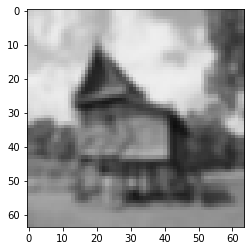

In [17]:
plt.imshow(dataset[0][0].permute(1,2,0))
# save_image(dataset[0][0], "test.jpg")

In [146]:
# dataset[0][0].shape

torch.Size([3, 224, 224])

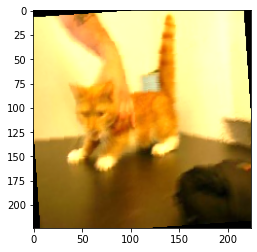

In [147]:
# plt.imshow(dataset[0][0].permute(1,2,0))
# save_image(dataset[0][0], "test.jpg")